In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 1. 법정동 코드 가공

In [198]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [150]:
locCode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   법정동코드   20556 non-null  int64  
 1   시도명     20556 non-null  object 
 2   시군구명    20387 non-null  object 
 3   읍면동명    20270 non-null  object 
 4   동리명     15222 non-null  object 
 5   생성일자    20556 non-null  int64  
 6   말소일자    0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


## 2. 실거래가 데이터 가공

In [151]:
apt = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [152]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  object 
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [153]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경..int64로
apt['거래금액'] = apt['거래금액'].str.replace(',', '').astype('int64') 
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  int64  
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 5.8+ MB


In [154]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt['전용면적(평)'] = round(apt['전용면적']/3.306, 2)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52
...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66


In [155]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
# 컬럼명 전용면적2(평)
apt['전용면적(평)2'] = np.floor(apt['전용면적(평)']).astype('int64')
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25


In [197]:
# 전용면적을 범주화 합니다.
# 컬럼명은 전용면적(평)3

bins=np.arange(0,86,5)
bins
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], bins)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",0
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",0
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",0
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",0
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",0
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",0
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",0
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",0


In [169]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

## 3. 데이타 프레임 병합

In [233]:
locCode_seoul = locCode[locCode['시도명']=='서울특별시']
locCode_seoul['법정동코드']=locCode_seoul['법정동코드'].astype(str)
locCode_seoul['법정동코드']=locCode_seoul['법정동코드'].str.slice(start=0,stop=5)
locCode_seoul.dropna(thresh=5, inplace=True)
locCode_seoul.rename(columns={'법정동코드':'지역코드'},inplace=True)
locCode_seoul['지역코드']=locCode_seoul['지역코드'].astype('int')
locCode_seoul = locCode_seoul[['지역코드', '시군구명']]
locCode_seoul.drop_duplicates(inplace=True)               # 이걸로 '구'를 추출 /w 지역코드. point.

C:\0_playdata_peg\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\0_playdata_peg\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\0_playdata_peg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [234]:
locCode_seoul

,지역코드,시군구명
2,11110,종로구
90,11140,중구
165,11170,용산구
202,11200,성동구
220,11215,광진구
228,11230,동대문구
239,11260,중랑구
246,11290,성북구
286,11305,강북구
291,11320,도봉구


In [241]:
result = pd.merge(apt, locCode_seoul, on='지역코드', how='inner')
result.drop('시군구명_x', axis=1, inplace=True)
result.rename(columns={'시군구명_y':'시군구명'}, inplace=True)
result

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",강동구


In [183]:
#apt['시군구명'] = np.where(locCode_seoul[법정동]==apt['법정동'], locCode['시군구명'], 0)
'''
where는 같은 dataFrame 안에서만 사용가능. 끝.
'''

In [ ]:
# locCode.rename(columns={'읍면동명':'법정동'}, inplace=True)
# locCode_seoul = locCode[locCode['시도명']=='서울특별시']
# locCode_seoul = locCode_seoul.dropna(thresh=5)

# locCode_seoul_apt = pd.merge(locCode_seoul, apt, on='법정동')
# locCode_seoul_apt
'''
데이터를 자세히 살펴봤다면 안했을 것 __ 법정동명과 읍면동명은 다르다는 점

'''

## 4. 데이타 분석


In [309]:
result

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명,연식
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",종로구,11
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",종로구,11
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",종로구,11
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",종로구,11
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",종로구,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",강동구,6
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구,10
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구,10
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",강동구,10


## 1. 아파트 연식과 평당 가격의 상관관계 

In [397]:
result['평당가격(만원)'] = result['거래금액']/result['전용면적(평)']
howMuch = result.pivot_table(values=['평당가격(만원)'], index=['연식']).sort_values(by='평당가격(만원)', ascending=True).astype('int64')
howMuch.tail()

,평당가격(만원)
연식,
42,5685
39,6306
40,6493
41,6627
37,8608


In [ ]:
# 연식과 평당가격을 각각 보면 관계를 전혀 알 수 없었음
# 시각화를 통해 눈으로 확인해야 그 관계를 확인할 수 있을거라 생각했음.

## 2. 구별 아파트 평균 연식

In [412]:
result['연식'] = result['거래년도']-result['건축년도']
howOld = result.pivot_table(values=['연식'], index=['시군구명']).sort_values(by='연식', ascending=False).astype('int64')
howOld.head()
howOld.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 노원구 to 은평구
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연식      25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


In [ ]:
# 앞으로 재개발될 가능성이 높다 = 집값이 오를 가능성이 높다 = 필요한 정보다
# '구' 경계선을 기준으로 서울 지도를 표현하고, 거기에 heatmap을 주고 싶었다.

## 5. 시각화
#### 시각화 그래프는 7개 이상 나와야 합니다.
    - 각각의 그래프마다 분석에 있어서 세웠던 전략과 시각화 목적을 간단한 코멘트를 달아주세요
#### 수업시간에 언급하지 않은 새로운 패턴의 그래프는 3개 이상 사용하시기 바랍니다.
    - 그래프에 대한 간단한 설명과 함께 코멘트로 직접 달아주세요

## 1. 아파트 연식과 평당 가격의 상관관계 

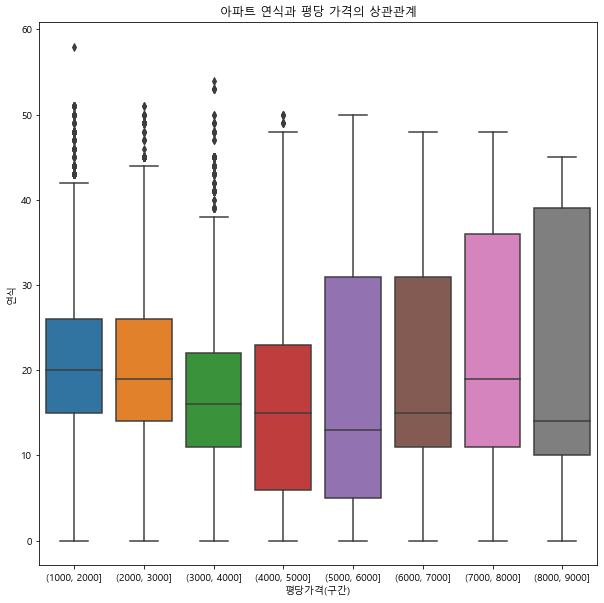

'\n5000만원을 기준으로, 5000만원 이상일 때 \n1) 이상치 존재하지 않는다\n2) 중앙값이 낮다\n3) box가 길다\n\n연식을 기준으로 중앙값이 낮다는 것은,  \n'

In [413]:
plt.figure(figsize=(10,10))
cate = np.arange(1000, 9001, 1000)

# 평당가격 구간설정
result['평당가격(구간)'] = pd.cut(result['평당가격(만원)'], cate) 
sns.boxplot(result['평당가격(구간)'], result['연식'])
plt.title('아파트 연식과 평당 가격의 상관관계')
plt.show()

'''
5000만원을 기준으로, 5000만원 이상일 때 
1) 이상치 존재하지 않는다
2) 중앙값이 낮다
3) box가 길다

연식을 기준으로 중앙값이 낮다는 것은,  
'''

## 2. 구별 아파트 평균 연식

In [404]:
!pip install folium

In [405]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [410]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = howOld['연식'],
               columns = [howOld.index, howOld['연식']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

#### 작업시간은 오후 3시까지 생각하고 있습니다.
    - 최종 발표시간은 4시입니다.